In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_parquet(r'C:\Users\91706\Data Analytics Practice\databases\python\tata motors cars\clean_tata_motors.parquet')

In [3]:
df.head(2)

,record_id,model,variant,year,region,dealer_name,engine_cc,max_power_bhp,max_torque_nm,kerb_weight_kg,...,loan_tenure_months,emi_monthly_rupees,total_interest_paid_lakhs,resale_value_5yrs_lakhs,ownership_cost_5yrs_lakhs,net_cost_of_ownership_lakhs,created_at,Fuel,GearBox,features_list
0,1,Tigor,Premium,2025,East,Dealer_68,1080,87.5,202,1185,...,48,4823.0,35000.0,128000.0,417000.0,289000.0,2025-10-12,Petrol,Manual,"[Heated Seats, Wireless Charging, Ambient Ligh..."
1,2,Harrier,Premium,2014,Central,Dealer_17,1028,99.1,78,1351,...,48,20600.0,137000.0,624000.0,1262000.0,638000.0,2025-10-12,Hybrid,Manual,"[Sunroof, Alloy Wheels, Push Start]"


- What is the distribution of car models, and regions?

In [22]:
plot1=df.groupby('model').size().reset_index(name='count').sort_values(by='count',ascending=True)
plot1

,model,count
6,Nano,37082
15,Zest,37179
11,Tiago,37369
10,Sumo,37381
8,Punch,37386
0,Altroz,37467
7,Nexon,37476
4,Hexa,37486
1,Curvv,37508
3,Harrier_EV,37528


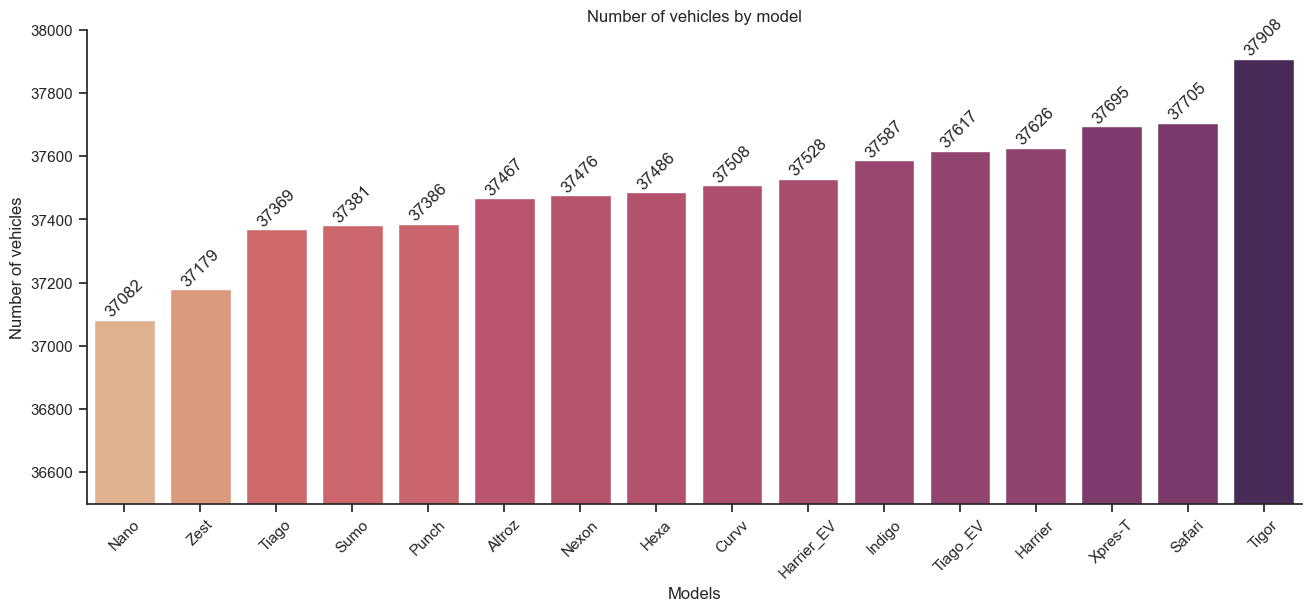

In [62]:
sns.set_theme(style='ticks')
fig, ax = plt.subplots(figsize=(13,6), constrained_layout=True)

ax=sns.barplot(data=plot1,x='model',y='count',hue='count',palette='flare',ax=ax)


plt.xlabel('Models')
plt.ylabel('Number of vehicles')
plt.title('Number of vehicles by model')
plt.ylim(36500,38000)
ax.legend_.remove()

for container in ax.containers:
    ax.bar_label(container, fmt='%d', rotation=45, label_type='edge')

ax.tick_params(axis='x', rotation=45)

sns.despine()
plt.show()


In [68]:
plot2=df.groupby('region').size().reset_index(name='count')
plot2

,region,count
0,Central,119906
1,East,120320
2,North,119818
3,South,120288
4,West,119668


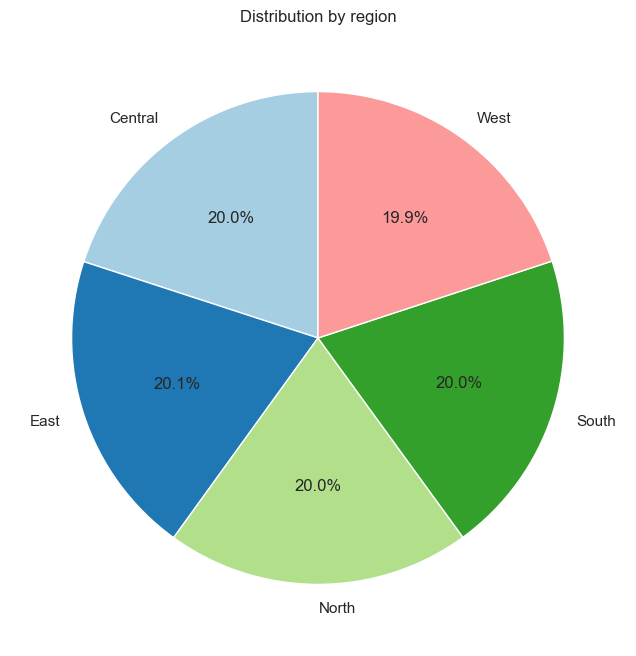

In [75]:
plt.figure(figsize=(10,8))
plt.pie(plot2['count'],
        labels=plot2['region'],
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})

plt.title('Distribution by region')
plt.show()

- Which fuel types and gearbox types are most common?

In [80]:
plot3=df.groupby('Fuel').size().sort_values(ascending=False).reset_index(name='count')
plot3

,Fuel,count
0,CNG,120831
1,Petrol,120511
2,Diesel,119737
3,Electric,119548
4,Hybrid,119373


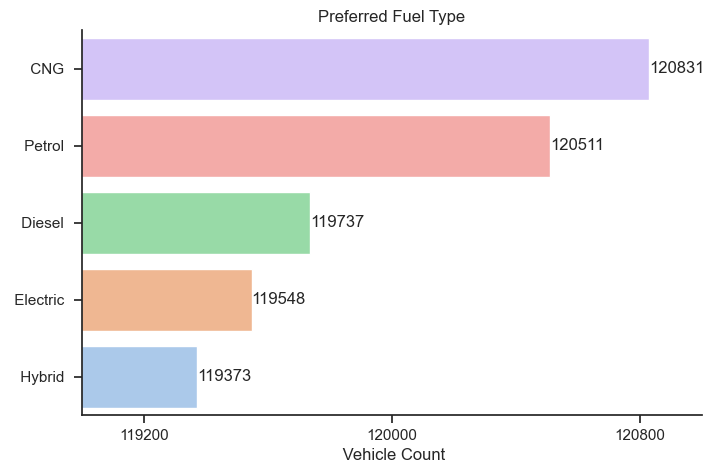

In [107]:
from matplotlib.ticker import MaxNLocator

sns.set_theme(style='ticks')
plt.figure(figsize=(8,5))
ax=sns.barplot(data=plot3,y='Fuel',x='count',hue='count',palette='pastel')

ax.legend_.remove()
plt.xlim(119000,121000)
plt.xlabel(' Vehicle Count')
plt.ylabel('')
plt.title('Preferred Fuel Type')

ax.xaxis.set_major_locator(MaxNLocator(nbins=3))

for container in ax.containers:
    ax.bar_label(container, fmt='%d', rotation=0, label_type='edge',fontsize=12)

sns.despine()
plt.show()

In [113]:
plot4=df.groupby('GearBox').size().sort_values(ascending=True).reset_index(name='count')
plot4

,GearBox,count
0,Automatic,149796
1,AMT,149976
2,DCT,150112
3,Manual,150116


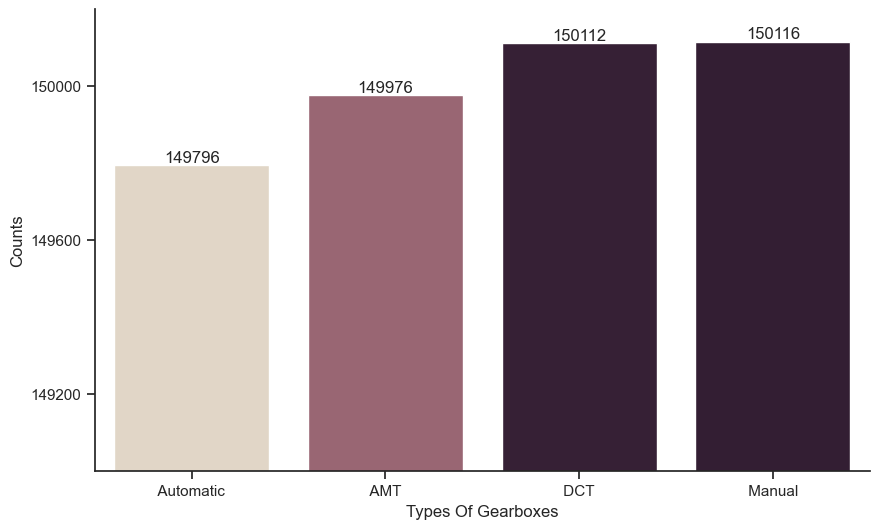

In [127]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=plot4,x='GearBox',y='count',hue='count',palette='ch:s=.25')

ax.legend_.remove()
plt.ylim(149000,150200)
ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
plt.xlabel('Types Of Gearboxes')
plt.ylabel('Counts')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', rotation=0, label_type='edge',fontsize=12)

sns.despine()
plt.show()

- How does price vary by fuel type & variant?

In [130]:
pd.set_option('display.max_columns', None)
df.head(2)

,record_id,model,variant,year,region,dealer_name,engine_cc,max_power_bhp,max_torque_nm,kerb_weight_kg,ex_showroom_price_lakhs,onroad_price_lakhs,down_payment_pct,loan_amount_lakhs,interest_rate_pct,loan_tenure_months,emi_monthly_rupees,total_interest_paid_lakhs,resale_value_5yrs_lakhs,ownership_cost_5yrs_lakhs,net_cost_of_ownership_lakhs,created_at,Fuel,GearBox,features_list
0,1,Tigor,Premium,2025,East,Dealer_68,1080,87.5,202,1185,208000.0,232000.0,15.0,197000.0,8.15,48,4823.0,35000.0,128000.0,417000.0,289000.0,2025-10-12,Petrol,Manual,"[Heated Seats, Wireless Charging, Ambient Ligh..."
1,2,Harrier,Premium,2014,Central,Dealer_17,1028,99.1,78,1351,889000.0,985000.0,13.5,852000.0,7.50,48,20600.0,137000.0,624000.0,1262000.0,638000.0,2025-10-12,Hybrid,Manual,"[Sunroof, Alloy Wheels, Push Start]"


In [144]:
plot5=df.groupby('Fuel')['onroad_price_lakhs'].mean().round(2).sort_values(ascending=False).reset_index(name='Mean Value')
plot5

,Fuel,Mean Value
0,Petrol,822977.86
1,Electric,820211.51
2,CNG,820082.23
3,Hybrid,819223.11
4,Diesel,818568.30


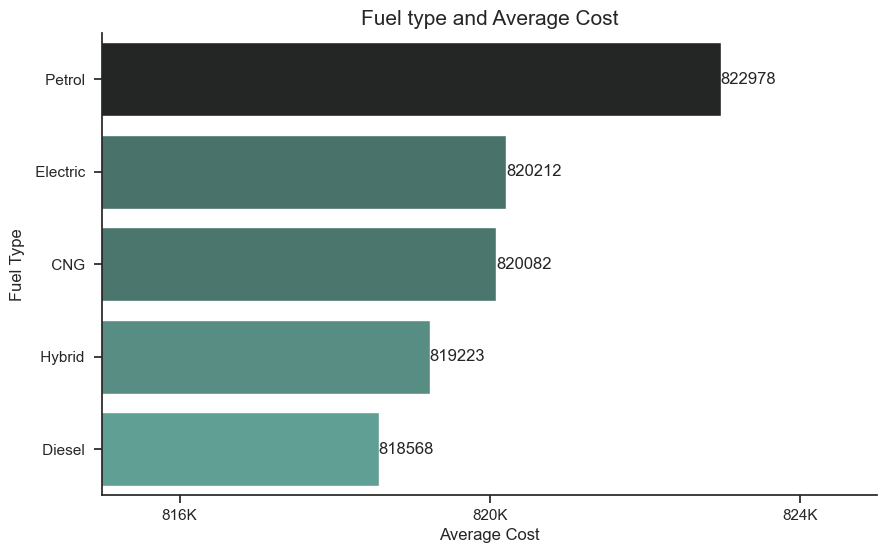

In [159]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=plot5,x='Mean Value',y='Fuel',hue='Mean Value',palette='dark:#5A9_r')

ax.legend_.remove()
plt.xlim(815000,825000)
plt.ylabel('Fuel Type')
plt.xlabel('Average Cost')
plt.title('Fuel type and Average Cost',fontsize=15)

for container in ax.containers:
    ax.bar_label(container)

ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))

sns.despine()
plt.show()

In [174]:
plot6=df.groupby('variant')['onroad_price_lakhs'].mean().round(2).sort_values(ascending=False).reset_index(name='Price')
plot6

,variant,Price
0,XZ+,822295.69
1,Adventure,821948.53
2,XT,821847.57
3,XM,821302.97
4,XZ,820883.62
5,XE,819773.41
6,Premium,819610.10
7,Smart,819094.76
8,Base,818629.65
9,Emotion,816794.12


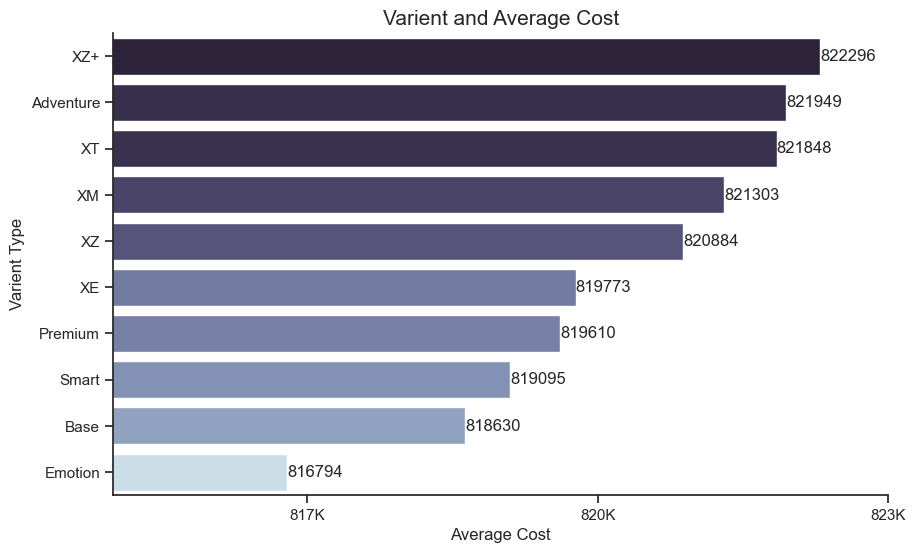

In [175]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=plot6,x='Price',y='variant',hue='Price',palette='ch:s=.25,rot=-.25')

ax.legend_.remove()
plt.xlim(815000,823000)
plt.ylabel('Varient Type')
plt.xlabel('Average Cost')
plt.title('Varient and Average Cost',fontsize=15)

for container in ax.containers:
    ax.bar_label(container)

ax.xaxis.set_major_locator(MaxNLocator(nbins=3))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{int(x/1000)}K'))

sns.despine()
plt.show()